<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/CompareImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install missingpy
!pip install scikit-learn==1.1.2

In [32]:
import sklearn
print(sklearn.__version__)

1.1.2


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**OriginalData**

In [34]:
import pandas as pd
widetable = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
widetable = widetable.iloc[:, 1:]
widetable.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen,Recent_Date,Recent_Creatinine,Recent_eGFR
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,215.0,81.0,123.0,99.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203,2565-11-03 09:37:44.910,0.73,79.14
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,219.0,64.0,146.0,73.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920,2565-11-03 09:37:44.910,0.73,79.14
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,193.0,62.0,129.0,65.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930,2565-11-03 09:37:44.910,0.73,79.14
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,205.0,69.0,139.0,76.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577,2565-11-03 09:37:44.910,0.73,79.14
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,198.0,74.0,129.0,60.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037,2565-11-03 09:37:44.910,0.73,79.14


In [35]:
df = widetable.copy()

**dummy**

In [36]:
widetable['Sex'] = widetable['Sex'].replace({'ชาย': 0, 'หญิง': 1})

In [37]:
nationality_map = {'ไทย': 0}

caucasian = ['บริติช  (อังกฤษ, สก็อตแลนด์)', 'อเมริกัน', 'เยอรมัน', 'โอมาน', 'ออสเตรเลีย', 'แคนาดา',
             'อิตาลี', 'สวิส', 'ซีเรีย', 'เดนมาร์ก', 'นอร์เวย์', 'ดัตช์', 'สเปน', 'เบลเยียม', 'ไอซ์แลนด์',
             'ฝรั่งเศส', 'เซนต์คิตส์และเนวิส', 'สวีเดน', 'ออสเตรีย', 'ไซปรัส']
asian = ['ลาว','จีน','เวียดนาม','เขมรอพยพ','ไทยลื้อ','ญี่ปุ่น', 'จีน(ไต้หวัน)']
other = ['ไม่ระบุ','อื่นๆ','ไร้สัญชาติ']

for nationality in asian:
    nationality_map[nationality] = 1

for nationality in caucasian:
    nationality_map[nationality] = 2

for nationality in other:
    nationality_map[nationality] = 3

widetable['NATNL'] = widetable['NATNL'].replace(nationality_map)

In [38]:
import numpy as np

In [39]:
widetable['LabLocation'] = np.where(widetable['LabLocation'] == "ห้องปฏิบัติการจุลทรรศน์วินิจฉัย", 1, 0)

In [40]:
df_no_missing = widetable.dropna()
df_no_missing= df_no_missing.reset_index(drop=True)
df_no_missing.shape

(148, 83)

In [41]:
remove = ['Slopes', 'PatientUID', 'PatientVisitUID','InPatient', 'OutPatient', 'Emergency','Recent_Date', 'VisitLocation', 'StartDTTM','EndDttm', 'LabCwhen']
no_missing = df_no_missing.drop(columns=remove)
no_missing.shape

(148, 72)

In [42]:
columns_with_null  = no_missing.isnull().any()
if columns_with_null.any():
    print("There are columns with null values.")
else:
    print("No columns have null values.")

No columns have null values.


**สุ่มค่าว่างในข้อมูล**

In [43]:
missing_percentage = widetable.isnull().mean()
missing_probabilities = missing_percentage / missing_percentage.sum()
print("Missing Percentages:")
print(missing_percentage)

print("\nMissing Probabilities (Normalized):")
print(missing_probabilities)

Missing Percentages:
PatientUID           0.0
PatientVisitUID      0.0
Slopes               0.0
G1M2:ARB             0.0
G3M1:Statin          0.0
                    ... 
LabLocation          0.0
LabCwhen             0.0
Recent_Date          0.0
Recent_Creatinine    0.0
Recent_eGFR          0.0
Length: 83, dtype: float64

Missing Probabilities (Normalized):
PatientUID           0.0
PatientVisitUID      0.0
Slopes               0.0
G1M2:ARB             0.0
G3M1:Statin          0.0
                    ... 
LabLocation          0.0
LabCwhen             0.0
Recent_Date          0.0
Recent_Creatinine    0.0
Recent_eGFR          0.0
Length: 83, dtype: float64


In [44]:
df_with_missing = no_missing.copy()

for column in df_with_missing.columns:
    num_missing = int(np.round(missing_probabilities[column] * len(df_with_missing)))
    missing_indices = np.random.choice(len(df_with_missing), num_missing, replace=False)
    df_with_missing.loc[missing_indices, column] = np.nan

In [45]:
df_with_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   G1M2:ARB                      148 non-null    float64
 1   G3M1:Statin                   148 non-null    float64
 2   G5M2:NSAIDs                   148 non-null    float64
 3   G1M5:Diuretic                 148 non-null    float64
 4   G1M7:Beta blocker             148 non-null    float64
 5   G1M3:Dihydropyridine CCB      148 non-null    float64
 6   G1M6:MRA                      148 non-null    float64
 7   G1M1:ACEI                     148 non-null    float64
 8   G2M2:Metformin                148 non-null    float64
 9   G2M3:DPP4 inhibitor           148 non-null    float64
 10  G2M1:SU                       148 non-null    float64
 11  G3M3:Fibrate                  148 non-null    float64
 12  G2M5:SGLT2i                   148 non-null    float64
 13  G4M1:

In [46]:
df_with_missing.isnull().sum()

G1M2:ARB                      0
G3M1:Statin                   0
G5M2:NSAIDs                   0
G1M5:Diuretic                 0
G1M7:Beta blocker             0
                             ..
L24:HDL Cholesterol           7
L28:UrineProtein/Cr ratio    12
LabLocation                   0
Recent_Creatinine             0
Recent_eGFR                   0
Length: 72, dtype: int64

In [47]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [49]:
import pandas as pd
import numpy as np
from scipy import stats

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
num_iterations = 10000

mse_results = {'Mice': [], 'MissForest': [], 'SimpleImpute': []}
mape_results = {'Mice': [], 'MissForest': [], 'SimpleImpute': []}
mae_results = {'Mice': [], 'MissForest': [], 'SimpleImpute': []}

In [52]:
for _ in range(num_iterations):
    # Generate random missing indices for each iteration
    random_missing_indices = {}
    for column in df_with_missing.columns:
        num_missing = int(np.round(missing_probabilities[column] * len(df_with_missing)))
        random_missing_indices[column] = np.random.choice(len(df_with_missing), num_missing, replace=False)

**MICE**



In [53]:
# Imputation with MICE
imputer_mice = IterativeImputer(random_state=0, initial_strategy='median')
data_mice = df_with_missing.copy()
for column in df_with_missing.columns:
    data_mice.loc[random_missing_indices[column], column] = np.nan

data_mice_filled = imputer_mice.fit_transform(data_mice)
Mice = pd.DataFrame(data_mice_filled, columns=data_mice.columns).round(1)
print("NaN counts in Mice:\n", Mice.isnull().sum())

mse_results['Mice'].append(mean_squared_error(no_missing, Mice))
true_values_mice = no_missing.values.flatten()
imputed_values_mice = Mice.values.flatten()

non_zero_mask_mice = true_values_mice != 0
true_values_non_zero_mice = true_values_mice[non_zero_mask_mice]
imputed_values_non_zero_mice = imputed_values_mice[non_zero_mask_mice]

mape_results['Mice'].append(np.mean(np.abs((true_values_non_zero_mice - imputed_values_non_zero_mice) / true_values_non_zero_mice)) * 100)
mae_results['Mice'].append(mean_absolute_error(no_missing, Mice))

NaN counts in Mice:
 G1M2:ARB                     0
G3M1:Statin                  0
G5M2:NSAIDs                  0
G1M5:Diuretic                0
G1M7:Beta blocker            0
                            ..
L24:HDL Cholesterol          0
L28:UrineProtein/Cr ratio    0
LabLocation                  0
Recent_Creatinine            0
Recent_eGFR                  0
Length: 72, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


**MissForest**

In [54]:
imputer_missforest = MissForest()
data_missforest = df_with_missing.copy()
for column in df_with_missing.columns:
    data_missforest.loc[random_missing_indices[column], column] = np.nan

data_missforest_filled = imputer_missforest.fit_transform(data_missforest)
MissForest = pd.DataFrame(data_missforest_filled, columns=data_missforest.columns).round(1)

# Check for NaN in MissForest
print("NaN counts in MissForest:\n", MissForest.isnull().sum())

mse_results['MissForest'].append(mean_squared_error(no_missing, MissForest))
true_values_missforest = no_missing.values.flatten()
imputed_values_missforest = MissForest.values.flatten()

non_zero_mask_missforest = true_values_missforest != 0
true_values_non_zero_missforest = true_values_missforest[non_zero_mask_missforest]
imputed_values_non_zero_missforest = imputed_values_missforest[non_zero_mask_missforest]

mape_results['MissForest'].append(np.mean(np.abs((true_values_non_zero_missforest - imputed_values_non_zero_missforest) / true_values_non_zero_missforest)) * 100)
mae_results['MissForest'].append(mean_absolute_error(no_missing, MissForest))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 4
NaN counts in MissForest:
 G1M2:ARB                     0
G3M1:Statin                  0
G5M2:NSAIDs                  0
G1M5:Diuretic                0
G1M7:Beta blocker            0
                            ..
L24:HDL Cholesterol          0
L28:UrineProtein/Cr ratio    0
LabLocation                  0
Recent_Creatinine            0
Recent_eGFR                  0
Length: 72, dtype: int64


**SimpleImpute**
```
* Mode = If the data type is 'object'.
* Mean = If the data type is numeric (not 'object') and dont have outlier
* Median = If the data type is numeric (not 'object') and have outlier
```

In [55]:
# Repeat similar process for Simple Impute
columns_to_keep = ['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM', 'EndDttm', 'LabCwhen']
df_subset = df.loc[df_with_missing.index]
missing_for_binary = pd.concat([df_subset[columns_to_keep], df_with_missing], axis=1)

for column in df_with_missing.columns:
    missing_for_binary.loc[random_missing_indices[column], column] = np.nan

def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return not outliers.empty

columns_with_null = missing_for_binary.columns[missing_for_binary.isnull().any()].tolist()
imputed_table = missing_for_binary.copy()

# Fill null values with column mode for object columns using apply and lambda function
for column in columns_with_null:
    if column in imputed_table.select_dtypes(include=['object']).columns:
        imputed_table[column].fillna(imputed_table[column].mode()[0], inplace=True)

# Impute missing values using the non-missing data
for column in columns_with_null:
    if column in imputed_table.select_dtypes(include=['float64']).columns:
        if detect_outliers(df_subset, column):
            # Median imputation for numeric columns with outliers
            median_values = df_subset.groupby('PatientVisitUID')[column].median()
            imputed_table[column].fillna(imputed_table['PatientVisitUID'].map(median_values), inplace=True)
        else:
            # Mean imputation for numeric columns without outliers
            mean_values = df_subset.groupby('PatientVisitUID')[column].mean()
            imputed_table[column].fillna(imputed_table['PatientVisitUID'].map(mean_values), inplace=True)

def fill_missing_values(data, column, method):
    if method == 'mean':
        data[column].fillna(data[column].mean(), inplace=True)
    elif method == 'median':
        data[column].fillna(data[column].median(), inplace=True)
    elif method == 'mode':
        data[column].fillna(data[column].mode()[0], inplace=True)

# Check for outliers in each column and fill missing values accordingly
for column in columns_with_null:
    outliers = detect_outliers(imputed_table, column)
    if imputed_table[column].dtype == 'object':
        fill_missing_values(imputed_table, column, 'mode')
        print(f"Column '{column}' was filled with 'mode'.")
    elif not outliers:
        fill_missing_values(imputed_table, column, 'mean')
        print(f"Column '{column}' was filled with 'mean'.")
    else:
        fill_missing_values(imputed_table, column, 'median')
        print(f"Column '{column}' was filled with 'median'.")


imputed_table = imputed_table.drop(columns=columns_to_keep)
print("NaN counts in Simple Impute:\n", imputed_table.isnull().sum())

mse_results['SimpleImpute'].append(mean_squared_error(no_missing, imputed_table))
true_values_simple = no_missing.values.flatten()
imputed_values_simple = imputed_table.values.flatten()

non_zero_mask_simple = true_values_simple != 0
true_values_non_zero_simple = true_values_simple[non_zero_mask_simple]
imputed_values_non_zero_simple = imputed_values_simple[non_zero_mask_simple]

mape_results['SimpleImpute'].append(np.mean(np.abs((true_values_non_zero_simple - imputed_values_non_zero_simple) / true_values_non_zero_simple)) * 100)
mae_results['SimpleImpute'].append(mean_absolute_error(no_missing, imputed_table))

Column 'BMI' was filled with 'median'.
Column 'BSA' was filled with 'median'.
Column 'Diastolic BP' was filled with 'median'.
Column 'Systolic BP' was filled with 'median'.
Column 'L2:BUN' was filled with 'median'.
Column 'L4:Sodium' was filled with 'median'.
Column 'L5:Potassium' was filled with 'median'.
Column 'L6:Chloride' was filled with 'median'.
Column 'L7:Bicarbonate' was filled with 'median'.
Column 'L8:Uric' was filled with 'median'.
Column 'L9:Calcium' was filled with 'median'.
Column 'L10:Phosphorus' was filled with 'median'.
Column 'L11:Albumin' was filled with 'median'.
Column 'L12:Hemoglobin' was filled with 'median'.
Column 'L13:Hematocrit' was filled with 'mean'.
Column 'L14:WBC' was filled with 'median'.
Column 'L15:Platelet' was filled with 'median'.
Column 'L19:Blood sugar' was filled with 'median'.
Column 'L20:HbA1c' was filled with 'median'.
Column 'L21:Cholesterol' was filled with 'median'.
Column 'L22:Triglyceride' was filled with 'median'.
Column 'L23:LDL Chole

#**Compare**



In [56]:
# Calculate means of the results
mean_mse_results = {method: np.mean(results) for method, results in mse_results.items()}
mean_mape_results = {method: np.mean(results) for method, results in mape_results.items()}
mean_mae_results = {method: np.mean(results) for method, results in mae_results.items()}

# Convert means to a DataFrame for easier printing
mean_evaluation_df = pd.DataFrame({
    'Method': list(mean_mse_results.keys()),
    'Mean MSE': list(mean_mse_results.values()),
    'Mean MAPE': list(mean_mape_results.values()),
    'Mean MAE': list(mean_mae_results.values())
})

# Print mean evaluation metrics
mean_evaluation_df

,Method,Mean MSE,Mean MAPE,Mean MAE
0,Mice,34.846029,2.729787,0.425582
1,MissForest,36.513200,1.983721,0.419392
2,SimpleImpute,45.728828,2.239042,0.506332


**Dont have to run after this**

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

imputed_data = {'OriginalData': no_missing}
imputed_data['Mice'] = Mice
imputed_data['MissForest'] = MissForest
imputed_data['SimpleImpute'] = imputed_table

In [58]:
pip install prettytable

In [59]:
pip install tabulate

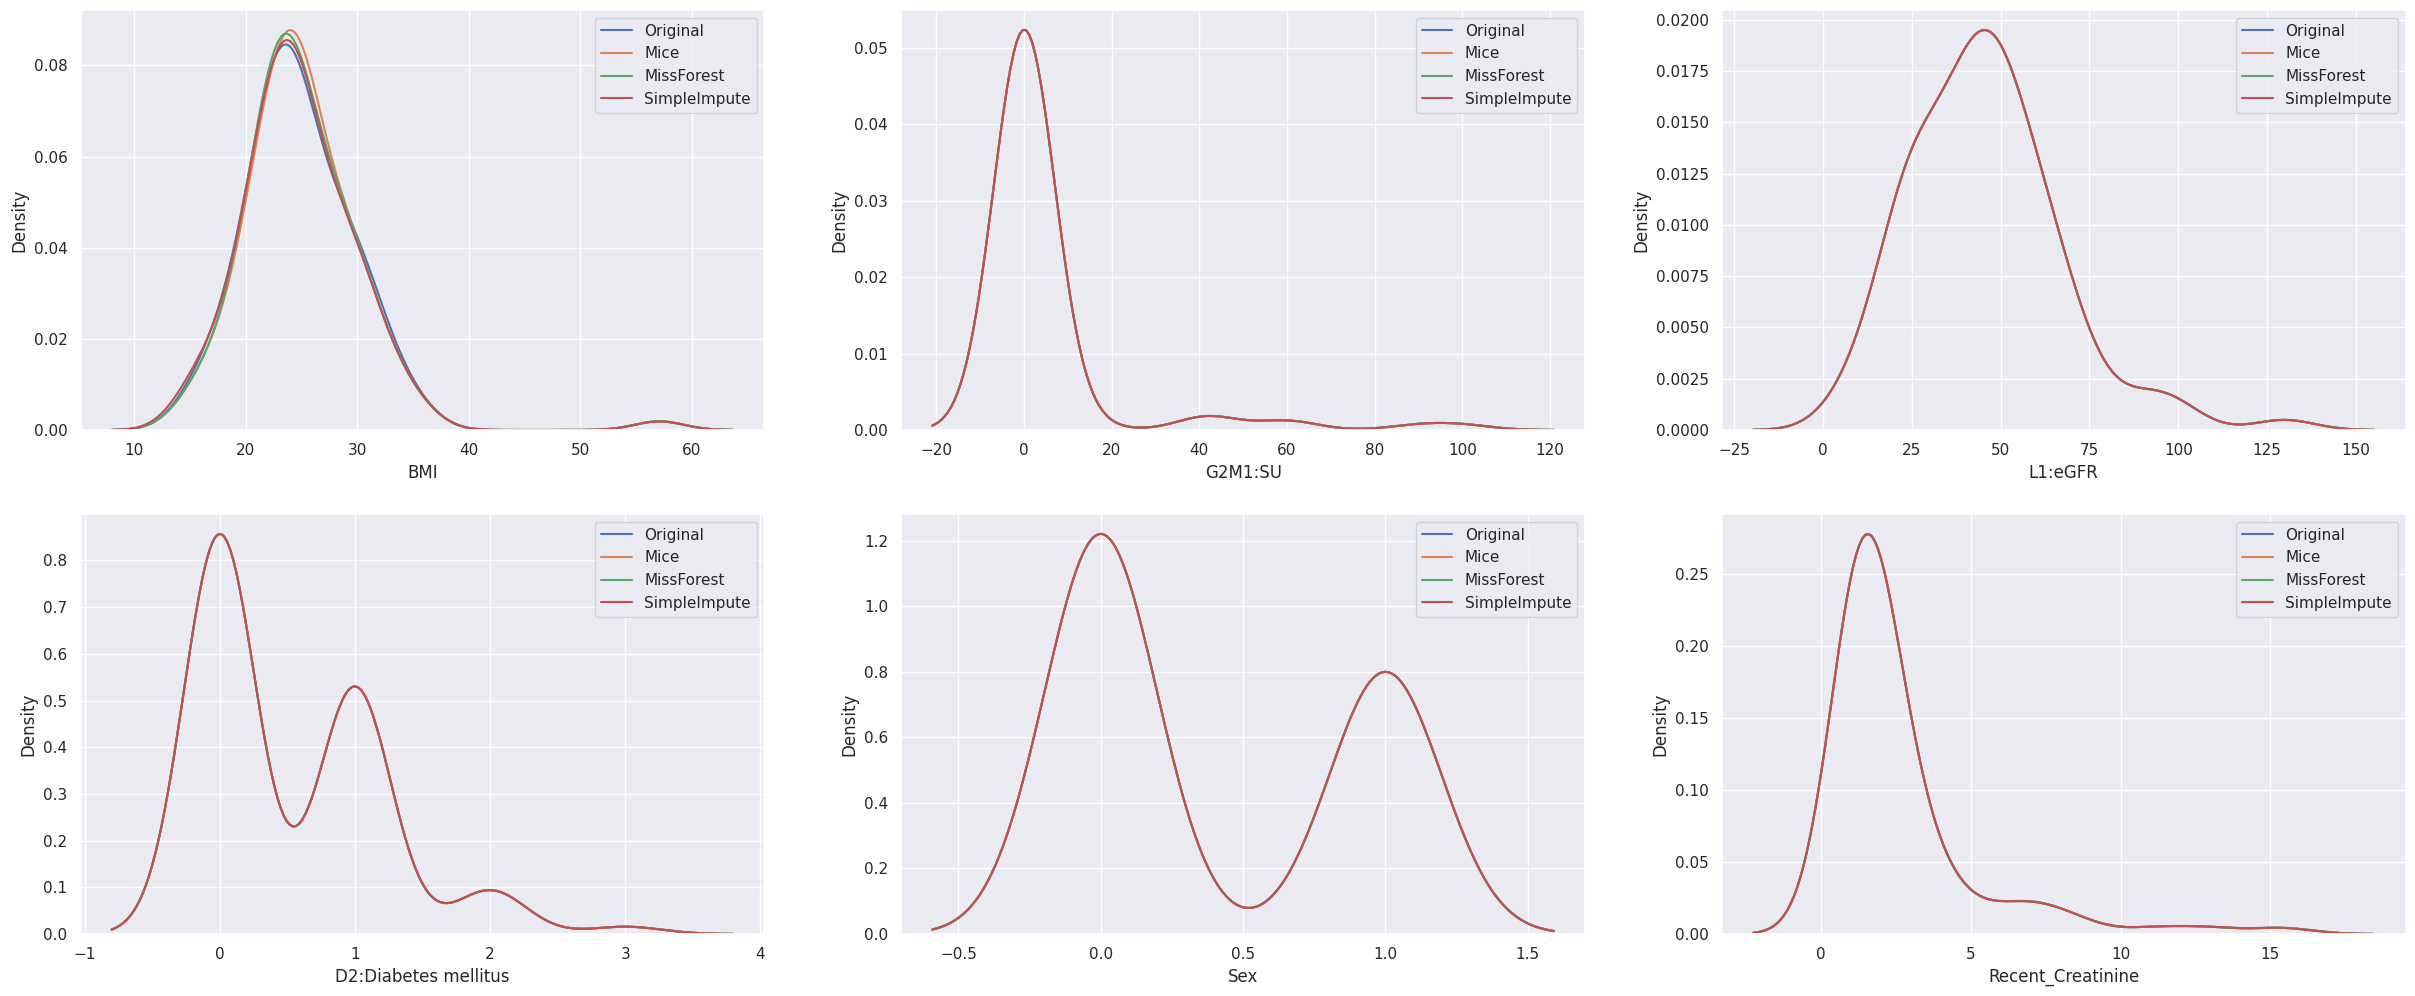

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['BMI', 'G2M1:SU', 'L1:eGFR', 'D2:Diabetes mellitus', 'Sex', 'Recent_Creatinine']

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(30, 12), nrows=2, ncols=3)

for col, i, j in zip(selected_columns, [0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]):
    sns.kdeplot(x=no_missing[col][df_with_missing.isnull().any(axis=1)], label='Original', ax=ax[i][j])
    sns.kdeplot(x=Mice[col][df_with_missing.isnull().any(axis=1)], label='Mice', ax=ax[i][j])
    sns.kdeplot(x=MissForest[col][df_with_missing.isnull().any(axis=1)], label='MissForest', ax=ax[i][j])
    sns.kdeplot(x=imputed_table[col][df_with_missing.isnull().any(axis=1)], label='SimpleImpute', ax=ax[i][j])

    ax[i][j].legend()

plt.show()
